In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/top50spotify2019/top50.csv


In [2]:
df = pd.read_csv('/kaggle/input/top50spotify2019/top50.csv', encoding = "ISO-8859-1")#, index_col='Unnamed: 0')
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [3]:
cols = df.columns
cols

Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [4]:
cols = list(map(lambda x: x.replace('.', '_'), cols))
cols

['Unnamed: 0',
 'Track_Name',
 'Artist_Name',
 'Genre',
 'Beats_Per_Minute',
 'Energy',
 'Danceability',
 'Loudness__dB__',
 'Liveness',
 'Valence_',
 'Length_',
 'Acousticness__',
 'Speechiness_',
 'Popularity']

In [5]:
df.columns = cols
df.head()

,Unnamed: 0,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness__dB__,Liveness,Valence_,Length_,Acousticness__,Speechiness_,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [6]:
df = df.rename(columns={'Loudness__dB__':'Loudness(dB)','Valence_': 'Valence', 'Length_':'Length', 'Acousticness__':'Acousticness', 'Speechiness_':'Speechiness'})
df.head()

,Unnamed: 0,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
Unnamed: 0          50 non-null int64
Track_Name          50 non-null object
Artist_Name         50 non-null object
Genre               50 non-null object
Beats_Per_Minute    50 non-null int64
Energy              50 non-null int64
Danceability        50 non-null int64
Loudness(dB)        50 non-null int64
Liveness            50 non-null int64
Valence             50 non-null int64
Length              50 non-null int64
Acousticness        50 non-null int64
Speechiness         50 non-null int64
Popularity          50 non-null int64
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [8]:
df.isnull().sum()

Unnamed: 0          0
Track_Name          0
Artist_Name         0
Genre               0
Beats_Per_Minute    0
Energy              0
Danceability        0
Loudness(dB)        0
Liveness            0
Valence             0
Length              0
Acousticness        0
Speechiness         0
Popularity          0
dtype: int64

In [9]:
print(df.Artist_Name.nunique(), df.Genre.nunique())

38 21


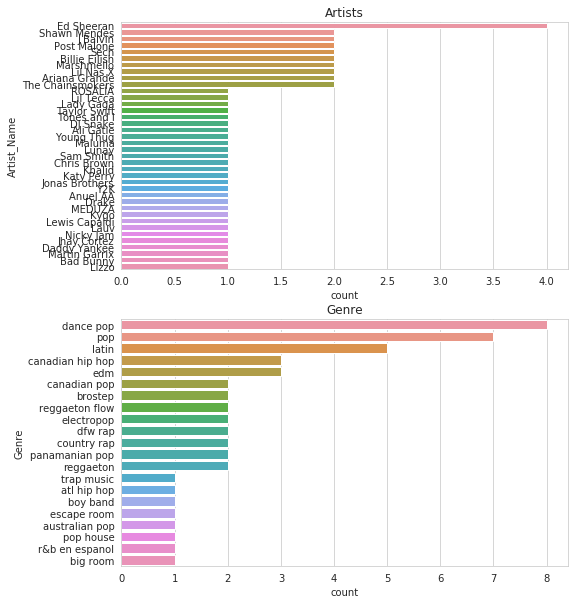

In [10]:
f,ax = plt.subplots(2, 1, figsize=(8,10))
ax[0].set_title('Artists')
sns.countplot(y=df.Artist_Name, ax=ax[0], order = df.Artist_Name.value_counts().index)

ax[1].set_title('Genre')
sns.countplot(y=df.Genre, ax=ax[1], order = df.Genre.value_counts().index)

In [11]:
cols = df.columns.tolist()[4:]
cols

['Beats_Per_Minute',
 'Energy',
 'Danceability',
 'Loudness(dB)',
 'Liveness',
 'Valence',
 'Length',
 'Acousticness',
 'Speechiness',
 'Popularity']

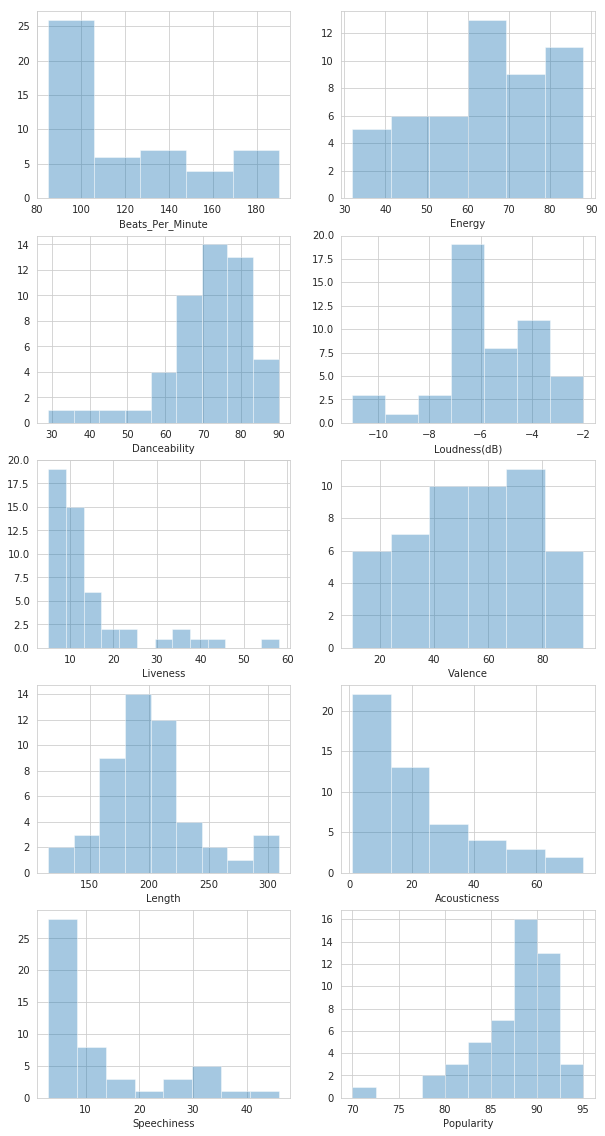

In [12]:
f, ax = plt.subplots((len(cols)+1)//2,2, figsize=(10, 20))
for i, col in enumerate(cols):
#     ax[i//2][i%2].set_title(col)
    sns.distplot(df[col], kde=False, ax=ax[i//2][i%2])

the "Popularity" will be of most interest. let's see how other variables effacts it.

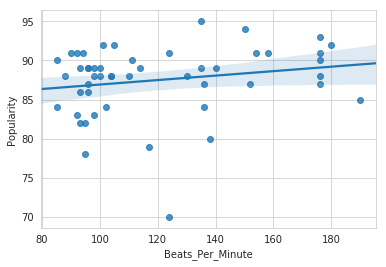

In [13]:
sns.regplot(x='Beats_Per_Minute', y='Popularity', data=df);

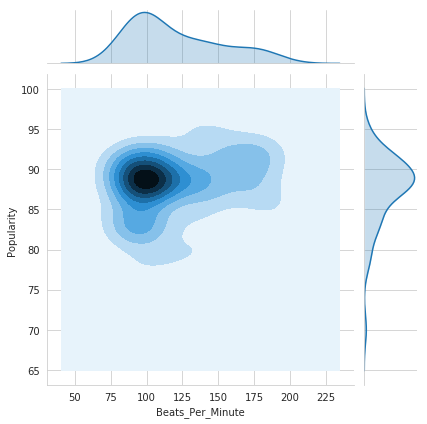

In [14]:
sns.jointplot(x='Beats_Per_Minute', y='Popularity', kind='kde', data=df);

seems in the range of 70-200 BPM higher beats is more catchy.

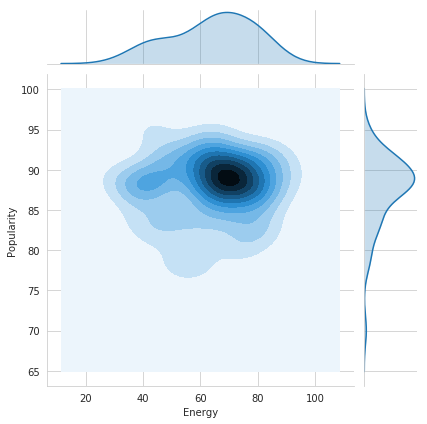

In [15]:
sns.jointplot(x='Energy', y='Popularity', kind='kde', data=df);

Energy does not seem to correlate

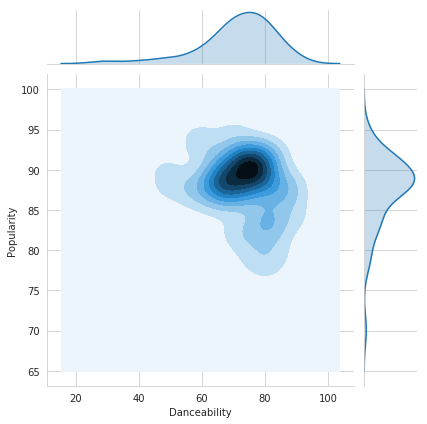

In [16]:
sns.jointplot(x='Danceability', y='Popularity', kind='kde', data=df);

May be people enjoy dancing and relaxing equally

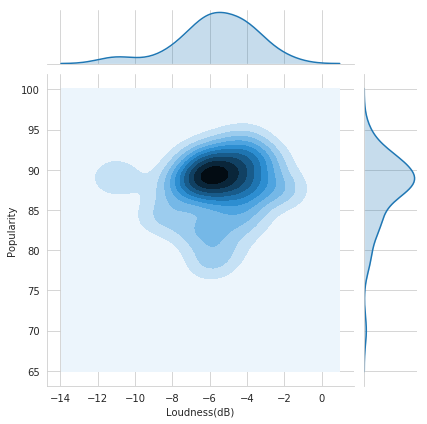

In [17]:
sns.jointplot(x='Loudness(dB)', y='Popularity', kind='kde', data=df);

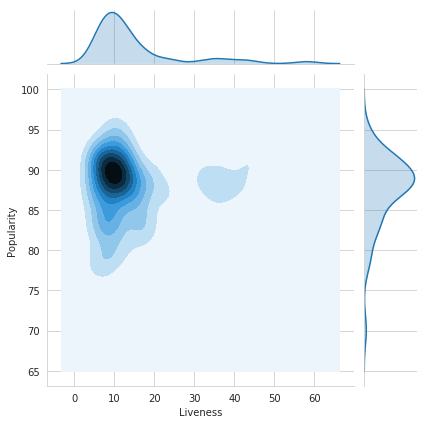

In [18]:
sns.jointplot(x='Liveness', y='Popularity', kind='kde', data=df);

Found a couple of explanation of 'Liveness' online:
https://www.britannica.com/science/acoustics/Acoustic-criteria#ref527622
https://www.researchgate.net/publication/289323172_Liveness_in_modern_music_Musicians_technology_and_the_perception_of_performance
https://towardsdatascience.com/is-my-spotify-music-boring-an-analysis-involving-music-data-and-machine-learning-47550ae931de

here is how Spotify defines it: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

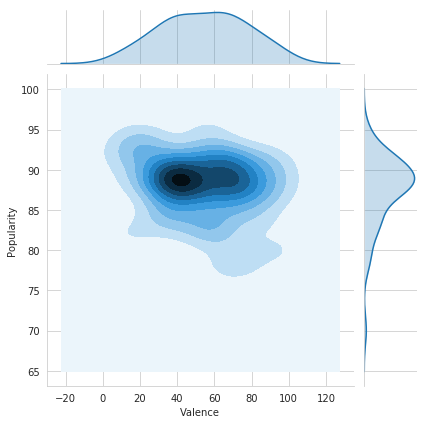

In [19]:
sns.jointplot(x='Valence', y='Popularity', kind='kde', data=df);

Spotify: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

Seems we have a slight preference for sad songs

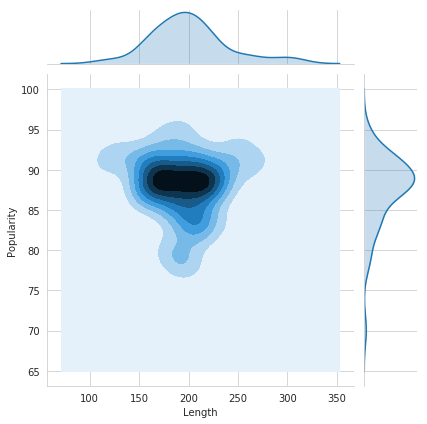

In [20]:
sns.jointplot(x='Length', y='Popularity', kind='kde', data=df);

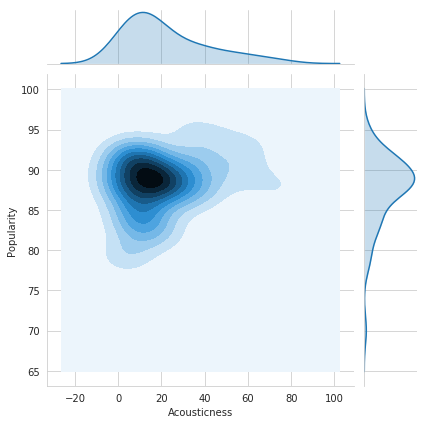

In [21]:
sns.jointplot(x='Acousticness', y='Popularity', kind='kde', data=df);

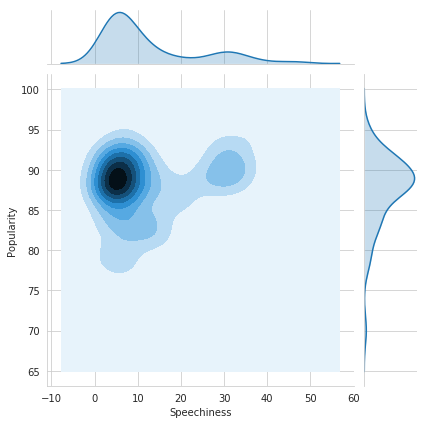

In [22]:
sns.jointplot(x='Speechiness', y='Popularity', kind='kde', data=df);

looks like raps and non-raps

Not quite sure why the following code is not working as expected

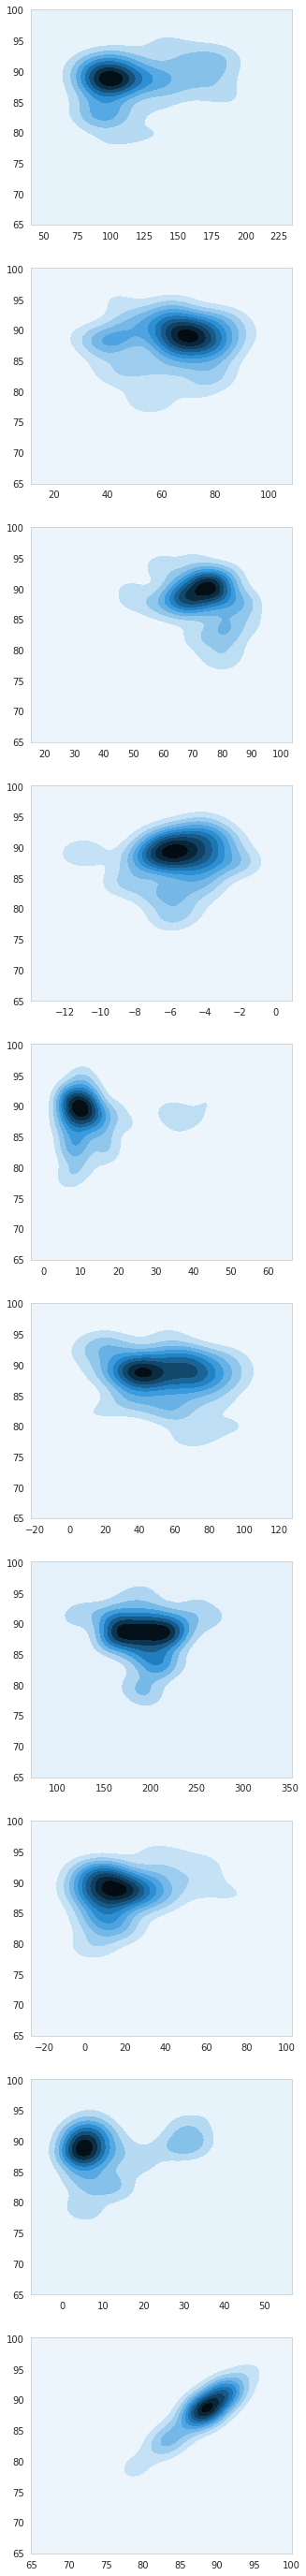

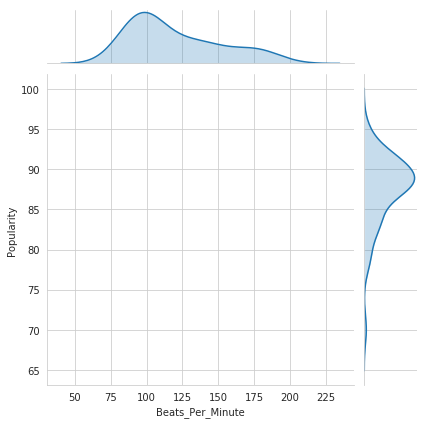

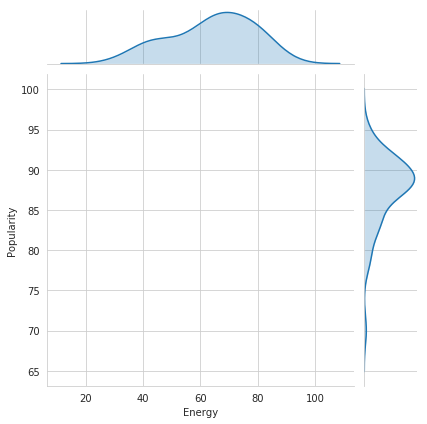

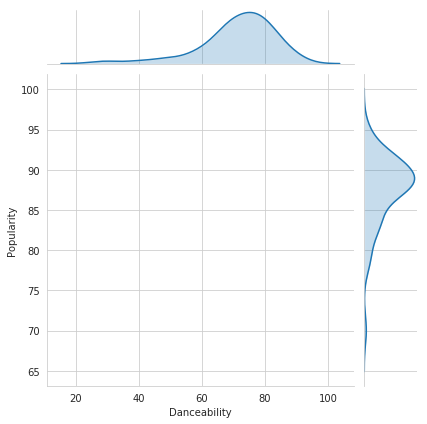

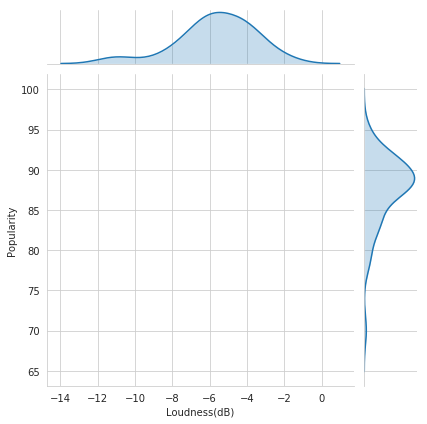

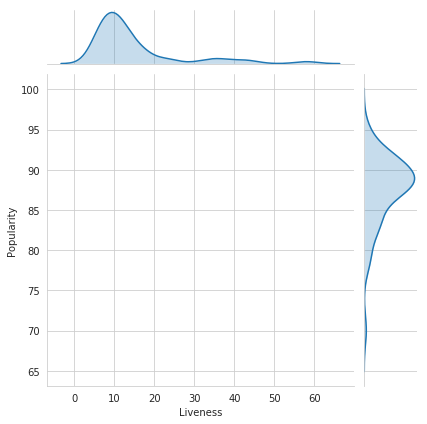

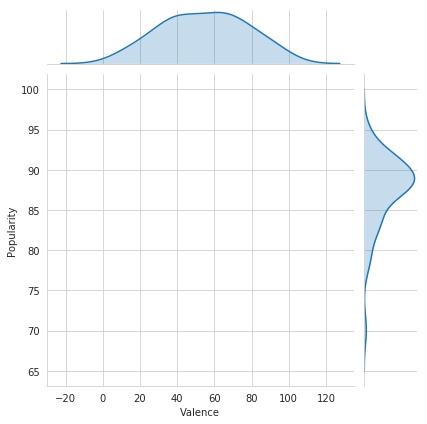

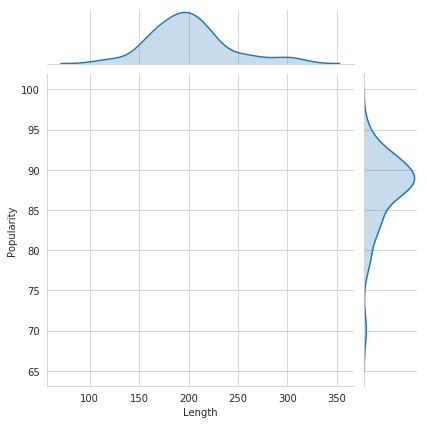

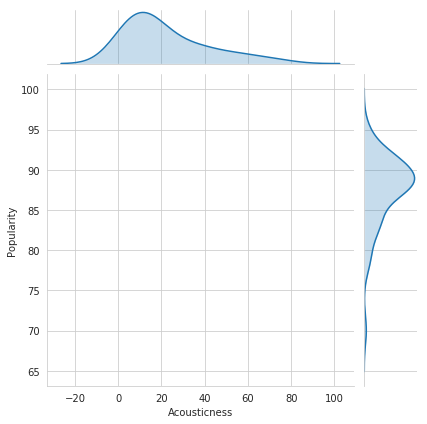

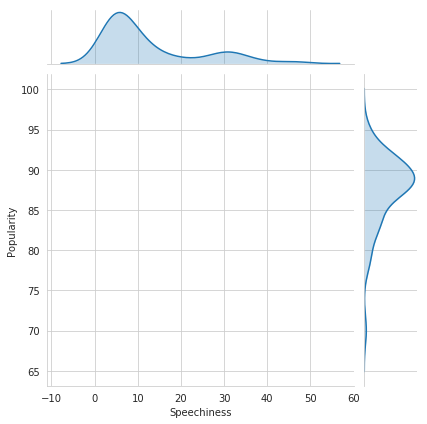

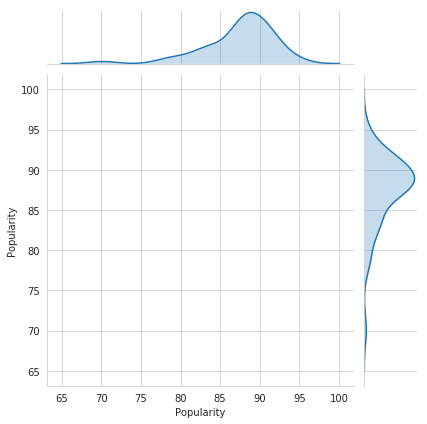

In [23]:
f, ax = plt.subplots(len(cols),1, figsize=(5, 50))
for i, col in enumerate(cols):
    sns.jointplot(x=col, y='Popularity', kind='kde', data=df, ax=ax[i]);

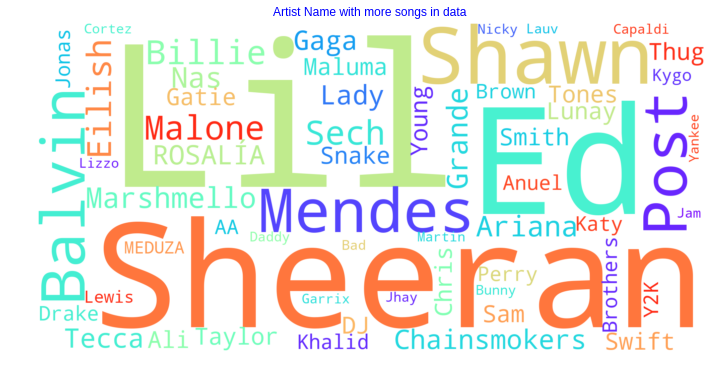

In [24]:
# Stolen from other kernel
from wordcloud import WordCloud
plt.style.use('seaborn')
wrds1 = df["Artist_Name"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="white").generate(" ".join(wrds1))
plt.figure(figsize=(12,18))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Artist Name with more songs in data ",color='b')
plt.show()